# Simple Linear Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
# Steps to perform.
1. Read the dataset. 
2. EDA, Feature Engineering(FE)
3. Divide it into dependent and independent.
4. Decide the train and test dataset.
5. Standard Scaling on train and Test data

In [91]:
df = pd.read_csv("text.csv")

In [92]:
df.head()

,Weight,Height
0,71.51521,136.4873
1,69.39874,153.0269
2,68.21660,142.3354
3,67.78781,144.2971
4,68.69784,123.3024


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  23 non-null     float64
 1   Height  23 non-null     float64
dtypes: float64(2)
memory usage: 500.0 bytes


In [94]:
df['Height'] = df['Height'].astype(str)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  23 non-null     float64
 1   Height  23 non-null     object 
dtypes: float64(1), object(1)
memory usage: 500.0+ bytes


In [96]:
df["Height"]=df['Height'].str.split(".").str[0]

In [97]:
df['Weight'] = df['Weight'].astype(str)

In [98]:
df['Weight'] =df['Weight'].str.split(".").str[0]

In [99]:
df.head()

,Weight,Height
0,71,136
1,69,153
2,68,142
3,67,144
4,68,123


In [100]:
df["Height"] =  df['Height'].astype(int)
df["Weight"] =  df['Weight'].astype(int)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


Text(0, 0.5, 'Height')

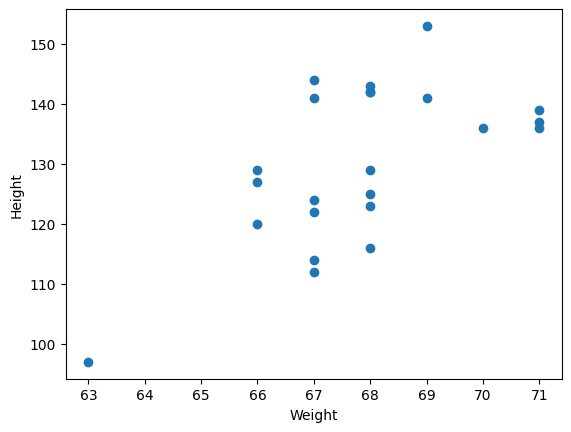

In [102]:
plt.scatter(df["Weight"],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [103]:
# Divide the feature into dependent and independent feature. 
X = df[["Weight"]] # Independent feature.
y = df['Height'] # Dependent feature. 

In [104]:
X.shape

(23, 1)

In [105]:
y.shape

(23,)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [108]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [109]:
y_train.shape, y_test.shape

((18,), (5,))

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
X_train = scaler.fit_transform(X_train)

In [114]:
# only transfom is applied to avoid the leakage of test data. 
X_test = scaler.transform(X_test)

In [115]:
X_test

array([[-1.12297985],
       [-1.12297985],
       [ 2.03540098],
       [-1.12297985],
       [ 2.03540098]])

In [116]:
X_train

array([[-0.49130368],
       [ 0.77204865],
       [ 0.14037248],
       [ 0.77204865],
       [ 0.14037248],
       [ 0.14037248],
       [ 0.14037248],
       [-0.49130368],
       [ 0.14037248],
       [-0.49130368],
       [ 0.14037248],
       [-3.01800835],
       [ 0.14037248],
       [-0.49130368],
       [-0.49130368],
       [ 2.03540098],
       [-0.49130368],
       [ 1.40372481]])

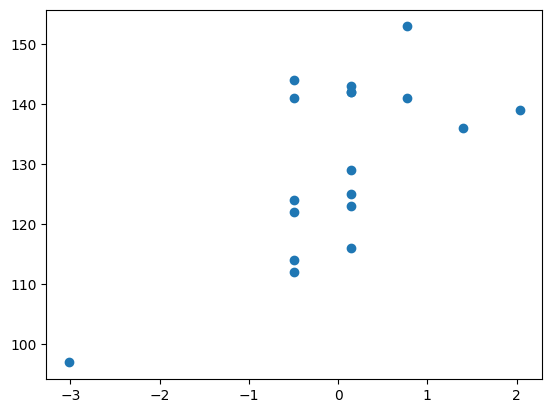

In [118]:
plt.scatter(X_train,y_train)

In [119]:
## Traning the model

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
regressor = LinearRegression()

In [122]:
# Traning the train data 
regressor.fit(X_train,y_train)

LinearRegression()

In [123]:
regressor.intercept_

np.float64(130.16666666666663)

In [125]:
regressor.coef_ # slope 

array([9.18269982])

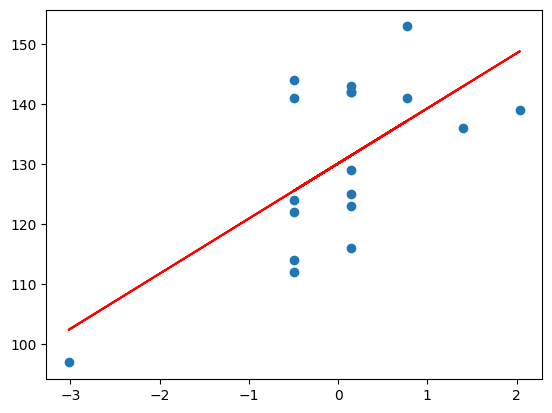

In [129]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r') #regressor.predict(X_train) applies the model to each value in X_train and outputs the predicted y values.

In [130]:
# Predection of test data 
y_pred_test = regressor.predict(X_test)

In [131]:
y_pred_test

array([119.8546798 , 119.8546798 , 148.85714286, 119.8546798 ,
       148.85714286])

In [132]:
y_test

15    129
9     127
0     136
8     120
17    137
Name: Height, dtype: int64

In [133]:
# Performance of Model (mse,mae,rmse)
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [135]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

88.12231187361992
8.23004926108375
9.387348500701352


In [136]:
## Accuracy of Model R square and Adjusted R square
from sklearn.metrics import r2_score

In [139]:
score = r2_score(y_test,y_pred_test)
score

-1.261866321191477